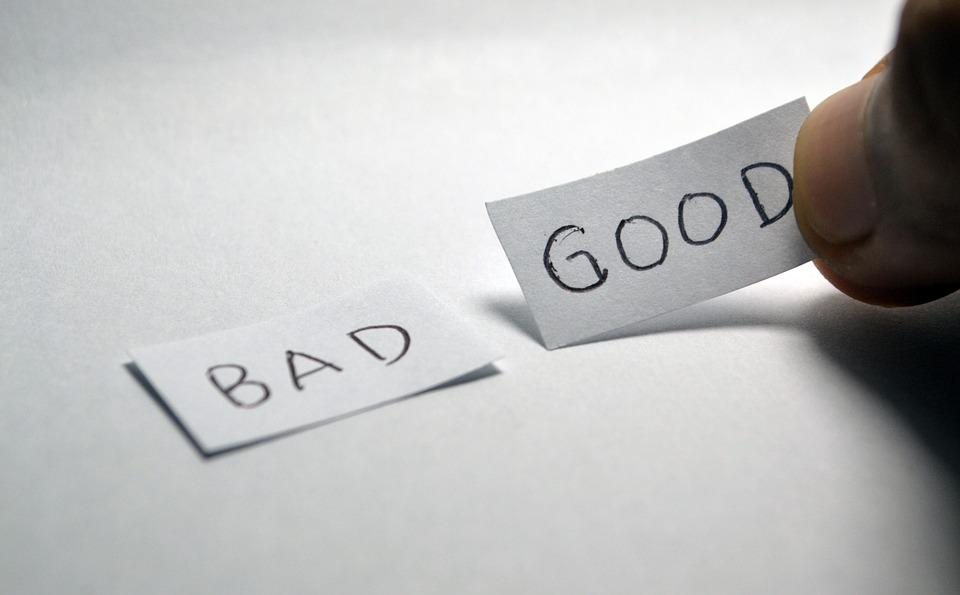

In [1]:
# Packages
import pandas as pd
import numpy as np

imdb_data = pd.read_table('C:/Users/Ntando/Downloads/sentiment labelled sentences/imdb_labelled.txt', names= ['sentence', 'sentiment'])

In [2]:
imdb_data.head()

,sentence,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [3]:
# function to get word length per row
def word_count(string):
    # get the word split
    word = string.split()

    # get the length
    length = len(word)
    # return length of word
    return length

imdb_data['word_len'] = imdb_data['sentence'].apply(word_count)

# Number of characters feature
imdb_data['num_characters'] = imdb_data['sentence'].apply(len)

# function to get the average word length
def avg_word_length(string):
    # get word lengths
    words = string.split()
    words_lengths = [len(word) for word in words]

    # get the average
    avg_word_length = sum(words_lengths)/len(words)
    return avg_word_length

imdb_data['avg_characters'] = imdb_data['sentence'].apply(avg_word_length)

# function to get the number of sentences
from nltk.tokenize import sent_tokenize, word_tokenize

def num_sentences(string):
    # make sentences
    sentences = sent_tokenize(string)
    length = len(sentences)
    return length


imdb_data['num_sentence'] = imdb_data['sentence'].apply(num_sentences)

import re

# function to get number of words stating with capital letters
def capital_letters(string):
    # the capital words
    capital_word = r"[A-Z]"
    capital_words = re.findall(capital_word, string)
    number_words = len(capital_words)
    return number_words

imdb_data['num_capital_letters'] = imdb_data['sentence'].apply(capital_letters)

# function of getting number of digits
def digits(string):
    digits_sent = r"[0-9]"
    digits_ = re.findall(digits_sent, string)
    digits = len(digits_)
    return digits

imdb_data['num_digits'] = imdb_data['sentence'].apply(digits)

imdb_data.head()

,sentence,sentiment,word_len,num_characters,avg_characters,num_sentence,num_capital_letters,num_digits
0,"A very, very, very slow-moving, aimless movie ...",0,13,87,5.615385,1,1,0
1,Not sure who was more lost - the flat characte...,0,19,99,4.157895,1,1,0
2,Attempting artiness with black & white and cle...,0,31,188,5.032258,1,1,0
3,Very little music or anything to speak of.,0,8,44,4.375000,1,1,0
4,The best scene in the movie was when Gerardo i...,1,21,108,4.095238,1,2,0


## Simple Logistic Regression and Naive Bayes Model

In [4]:
# Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


# Models
linear_model = LogisticRegression()
gnb = MultinomialNB()

#Selecting data
imdb_data_train = imdb_data.drop(['sentiment', 'sentence'], axis=1)
target = imdb_data['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(imdb_data_train, target, test_size = 0.25)

# Fit and predict
y_pred_lr = linear_model.fit(X_train, y_train).predict(X_test)
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
accuracy_log_ = linear_model.score(X_test, y_test)
accuracy_gnb = gnb.score(X_test, y_test)

print("The Logistic Regression accuracy of the test set is %.2f."%(accuracy_log_))
print("The Multinomial Naive Bayes accuracy of the test set is %.2f."%(accuracy_gnb))


The Logistic Regression accuracy of the test set is 0.58.
The Multinomial Naive Bayes accuracy of the test set is 0.48.


C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Bag of Words Naive Bayes Classifier

In [5]:
import time
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(strip_accents ='ascii', stop_words='english', lowercase='True')

imd_train = imdb_data['sentence']
imd_test = imdb_data['sentiment']


# Split the data
X_train_, X_test_, y_train_, y_test_ = train_test_split(imd_train, imd_test, test_size = 0.25)


X_train_bow = vectorizer.fit_transform(X_train_)
X_test_bow = vectorizer.transform(X_test_)

clf = MultinomialNB()

start_time = time.time()
clf.fit(X_train_bow, y_train_)
accuracy_clf = clf.score(X_test_bow, y_test_)
print("The program took %.3f seconds to complete. The accuracy of the test set is %.2f."%(time.time()- start_time, accuracy_clf))



The program took 0.000 seconds to complete. The accuracy of the test set is 0.76.


In [6]:
# Logistic Regression

log_model = LogisticRegression()

start_time = time.time()
log_model.fit(X_train_bow, y_train_)
accuracy_log = log_model.score(X_test_bow, y_test_)
print("The program took %.3f seconds to complete. The accuracy of the test set is %.2f."%(time.time()- start_time, accuracy_log))



The program took 0.030 seconds to complete. The accuracy of the test set is 0.78.


## N-Grams

In [7]:
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))

X_train_ng1 = vectorizer_ng1.fit_transform(X_train_)
X_test_ng1 = vectorizer_ng1.transform(X_test_)

clf_ng1 = MultinomialNB()

start_time = time.time()
clf_ng1.fit(X_train_ng1, y_train_)
accuracy_clf_ng1 = clf_ng1.score(X_test_ng1, y_test_)
print("The program took %.3f seconds to complete. The accuracy of the test set is %.2f."%(time.time()- start_time, 
                                                                                          accuracy_clf_ng1))


The program took 0.000 seconds to complete. The accuracy of the test set is 0.80.


In [8]:
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))

X_train_ng2 = vectorizer_ng2.fit_transform(X_train_)
X_test_ng2 = vectorizer_ng2.transform(X_test_)

clf_ng2 = MultinomialNB()

start_time = time.time()
clf_ng2.fit(X_train_ng2, y_train_)
accuracy_clf_ng2 = clf_ng2.score(X_test_ng2, y_test_)
print("The program took %.3f seconds to complete. The accuracy of the test set is %.2f."%(time.time()- start_time, 
                                                                                          accuracy_clf_ng2))


The program took 0.000 seconds to complete. The accuracy of the test set is 0.79.


In [9]:
vectorizer_ng3 = CountVectorizer(ngram_range=(1,3))

X_train_ng3 = vectorizer_ng3.fit_transform(X_train_)
X_test_ng3 = vectorizer_ng3.transform(X_test_)

clf_ng3 = MultinomialNB()

start_time = time.time()
clf_ng3.fit(X_train_ng3, y_train_)
accuracy_clf_ng3 = clf_ng3.score(X_test_ng3, y_test_)
print("The program took %.3f seconds to complete. The accuracy of the test set is %.2f."%(time.time()- start_time, 
                                                                                          accuracy_clf_ng3))


The program took 0.000 seconds to complete. The accuracy of the test set is 0.79.
